In [212]:
import pandas as pd
import numpy as np
import json


## Exercise 1

First we load and take a look at the dataset

In [213]:
with open("data/dessert.json") as json_file: 
    dessert_json = json.load(json_file)
dessert_data = pd.read_json("data/dessert.json")
dessert_data.drop(["portions", "nutrients"],axis=1,inplace=True)
dessert_data_port = pd.json_normalize(dessert_json, record_path=["portions"],meta=["id","type"],meta_prefix="origin-") # flatten json object into separate df
dessert_data_nutr = pd.json_normalize(dessert_json, record_path=["nutrients"],meta=["id","type"], meta_prefix="origin-") # flatten json object into separate df
dessert_data.sample(10)



,id,description,tags,manufacturer,type
20,18037,Healthy Bread with oat bran and cream,[],,Sweet Bread
195,18294,"Pancakes, blueberry, prepared from recipe",[],None,Cake
63,18103,"Coffeecake, cheese",[],,Cake
371,18651,"NABISCO, NABISCO SNACKWELL'S Fat Free Devil's ...",[],None,Cake
278,18438,"English muffins, plain, unenriched, with calci...",[],,Muffins
181,18275,"Muffins, blueberry, dry mix",[],,Muffins
232,18358,"Sweet rolls, cinnamon, refrigerated dough with...",[],None,Sweet Bread
275,18435,"Danish pastry, raspberry, unenriched",[],,Puff Pastry
96,18156,"Cookies, fudge, cake-type (includes trolley ca...",[],,Cookies
179,18272,"Ice cream cones, sugar, rolled-type",[],,Sweet Bread


### Exercise 1a)

We decided to replace empty Strings and `None` values with the string "No manufacturer" for the **Manufacturer** column:

In [214]:
dessert_data.replace("", None, inplace=True)
dessert_data.fillna(value="no Manufacturer",inplace=True)
dessert_data["manufacturer"].sample(40) 

225    no Manufacturer
292       Kellogg, Co.
236    no Manufacturer
181    no Manufacturer
14     no Manufacturer
377    no Manufacturer
372    no Manufacturer
351    Archway Cookies
299       Kellogg, Co.
106    no Manufacturer
120    no Manufacturer
199    no Manufacturer
284    no Manufacturer
125    no Manufacturer
340    Archway Cookies
33     no Manufacturer
19     no Manufacturer
43     no Manufacturer
334    Archway Cookies
207    no Manufacturer
98     no Manufacturer
388    no Manufacturer
331    Archway Cookies
152    no Manufacturer
241    no Manufacturer
163    no Manufacturer
348    Archway Cookies
90     no Manufacturer
212    no Manufacturer
244    no Manufacturer
322    Archway Cookies
190    no Manufacturer
220    no Manufacturer
242    no Manufacturer
326    Archway Cookies
258    no Manufacturer
315       Kellogg, Co.
53     no Manufacturer
24     no Manufacturer
285    no Manufacturer
Name: manufacturer, dtype: object

Next, we need to extract the contents of the lists in the **tags** column. We define a function to print the content of the list and return it:

In [215]:
def print_list(my_list):
    if len(my_list) > 0:
        count = 0
        for x in my_list:
            print(f"list value of element {count}: {x}")
            count += 1
    return my_list
dessert_data["tags"].map(print_list)

list value of element 0: Include commodity code B367
list value of element 0: Include commodity code B368
list value of element 0: Latino food
list value of element 0: Latino food


0                 []
1                 []
2                 []
3                 []
4                 []
           ...      
387               []
388               []
389               []
390    [Latino food]
391    [Latino food]
Name: tags, Length: 392, dtype: object

As you can see, we have only 4 list entries actually containing any tags in the entire column. And for those entries, the list has a length of 1, which means we can use a similiar function to extract the values from the list and return them as a string to the dataframe:

In [216]:
def extract_list_ele(my_list): #returns first content of list if non empty and "no Tags" otherwise
    if type(my_list) == list: # check if we are working on lists
        if len(my_list) == 0:
            return "no Tags"
        else:
            return my_list[0]
    else: #if not list, do nothing
        return my_list

dessert_data["tags"]=dessert_data["tags"].map(extract_list_ele)

dessert_data.sample(10)

,id,description,tags,manufacturer,type
232,18358,"Sweet rolls, cinnamon, refrigerated dough with...",no Tags,no Manufacturer,Sweet Bread
5,18016,"Biscuits, plain or buttermilk, prepared from r...",no Tags,no Manufacturer,Biscuits
25,18042,Whole-wheat Pita Doughnut,no Tags,no Manufacturer,Sweet bread
272,18432,"Bread, white, commercially prepared, toasted, ...",no Tags,no Manufacturer,Sweet Bread
287,18457,"Crackers, saltines, fat-free, low-sodium",no Tags,no Manufacturer,Savory Bread
23,18040,Oatmeal doughnut (toasted),no Tags,no Manufacturer,Sweet Bread
37,18064,"Bread, wheat, jam",no Tags,no Manufacturer,Sweet Bread
237,18365,"Waffles, plain, frozen, ready-to-heat",no Tags,no Manufacturer,Biscuits
191,18290,"Pancakes, plain, dry mix, complete, prepared",no Tags,no Manufacturer,Cake
31,18050,"Banana bread, reduced-calorie",no Tags,no Manufacturer,Sweet bread


lets look at the nutr table and check it for none types:

In [217]:
nutr_none =dessert_data_nutr[dessert_data_nutr["type"].isna()] #filter out all rows containing a None type val
nutr_none

,value,units,description,type,origin-id,origin-type
8443,0.078,mg,Vitamin B-6,None,18201,Cookies


We only have one single entry which is None, so we can overwrite it manually with the "Vitamin" type:

In [218]:
dessert_data_nutr.at[8443,"type"] = "Vitamins"
nutr_none =dessert_data_nutr[dessert_data_nutr["type"].isna()]
nutr_none #should be empty now

,value,units,description,type,origin-id,origin-type


Next, there is one negative value which we need to set to zero: 

In [219]:
dessert_data_nutr[dessert_data_nutr["value"]< 0]

,value,units,description,type,origin-id,origin-type
416,-88.0,mcg,"Folate, total",Vitamins,18017,Biscuits


In [220]:
dessert_data_nutr.at[416, "value"] = 0
dessert_data_nutr[dessert_data_nutr["value"]<0]

,value,units,description,type,origin-id,origin-type


### Exercise 1b)



In [222]:
#get unique dessert types
dessert_data["type"].unique()

array(['Biscuits', 'Sweet Bread', 'Savory Bread', 'Sweet bread',
       'Sweet Breads', 'no Manufacturer', 'Cake', 'Cookies', 'Coookies',
       'Puff Pastry', 'Savory bread', 'Cream Puff', 'Muffins',
       'sweet bread', 'Muffin', 'Toaster Pastries', 'Muesli', 'Biscuit',
       'Cookie'], dtype=object)

<AxesSubplot:>

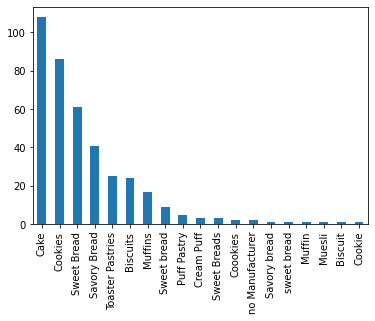

In [224]:
#get dessert type distribution
dessert_data["type"].value_counts().plot.bar()